In [1]:
#import all the necessary libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
#open the file
data = pd.read_csv("amazon.csv", encoding="latin1", thousands=".")
data

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1/1/1998
1,1999,Acre,Janeiro,0,1/1/1999
2,2000,Acre,Janeiro,0,1/1/2000
3,2001,Acre,Janeiro,0,1/1/2001
4,2002,Acre,Janeiro,0,1/1/2002
...,...,...,...,...,...
6449,2012,Tocantins,Dezembro,128,1/1/2012
6450,2013,Tocantins,Dezembro,85,1/1/2013
6451,2014,Tocantins,Dezembro,223,1/1/2014
6452,2015,Tocantins,Dezembro,373,1/1/2015


In [3]:
data.head() #check the first five elements of the data

,year,state,month,number,date
0,1998,Acre,Janeiro,0,1/1/1998
1,1999,Acre,Janeiro,0,1/1/1999
2,2000,Acre,Janeiro,0,1/1/2000
3,2001,Acre,Janeiro,0,1/1/2001
4,2002,Acre,Janeiro,0,1/1/2002


In [4]:
data.describe() #describes the data

,year,number
count,6454.000000,6454.000000
mean,2007.461729,522.696312
std,5.746654,1554.846486
min,1998.000000,0.000000
25%,2002.000000,9.000000
50%,2007.000000,54.000000
75%,2012.000000,269.000000
max,2017.000000,25963.000000


In [5]:
data.shape #Checks for the number of rows and columns

(6454, 5)

In [6]:
data.isna().sum() # check for the sum of misssing/null values

year      0
state     0
month     0
number    0
date      0
dtype: int64

In [7]:
data2 = data.groupby("state")["number"].sum().reset_index() 
#returns the total number of fires in each year
#reset_index set the default index as 0,1,2....
data2

,state,number
0,Acre,68345
1,Alagoas,4644
2,Amapa,25116
3,Amazonas,117467
4,Bahia,226979
5,Ceara,80162
6,Distrito Federal,3561
7,Espirito Santo,6546
8,Goias,111970
9,Maranhao,375279


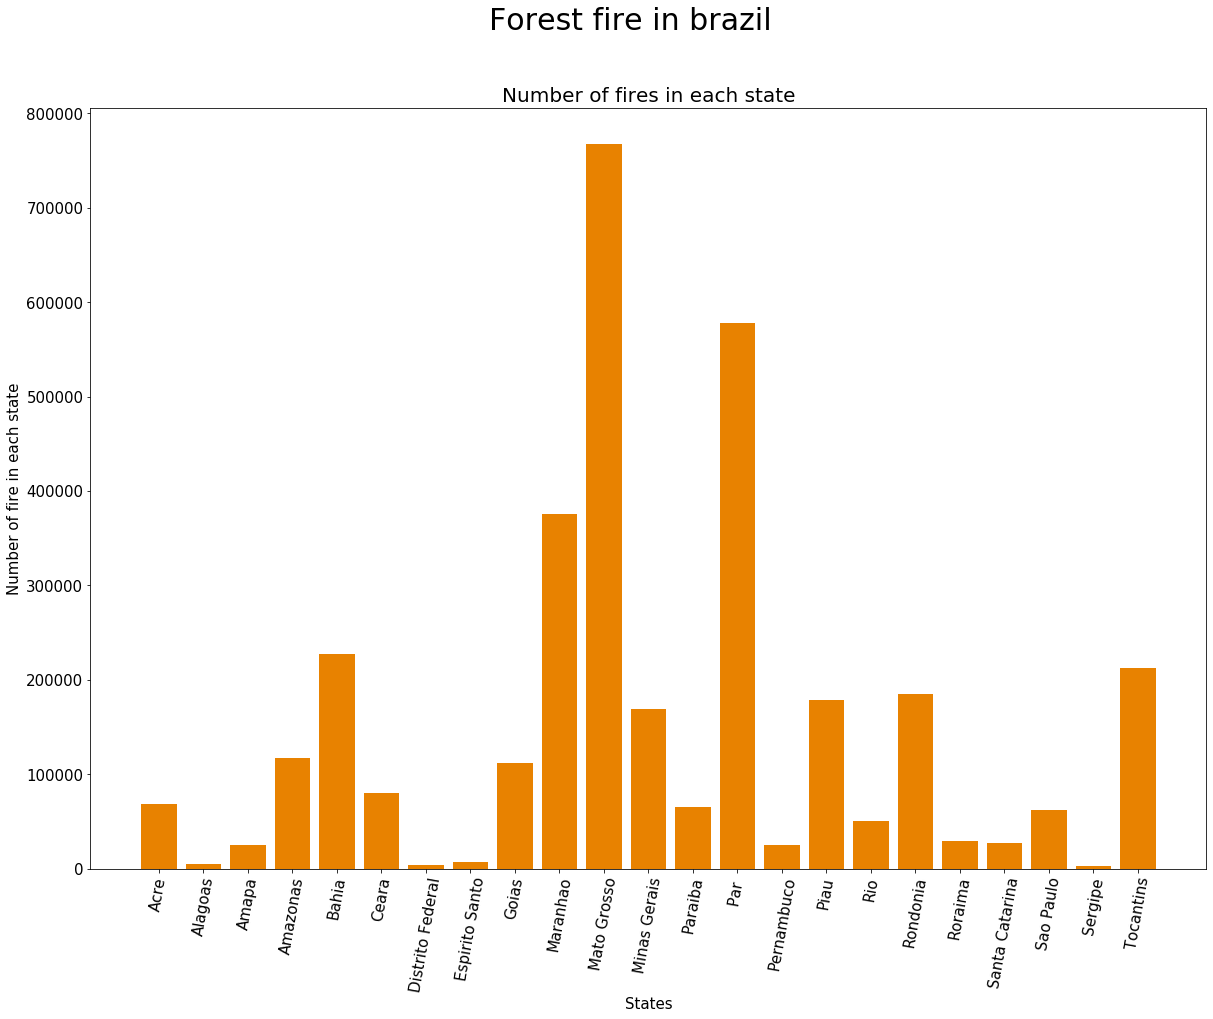

In [8]:
#we can plot our bar graph now
plt.figure(figsize=(20,14))#create a figure
plt.bar(data2["state"], data2["number"], color="#e88200")
plt.xticks(rotation=80, fontsize=15)
plt.yticks(fontsize=15)
plt.suptitle("Forest fire in brazil", fontsize=30, ha="center")
plt.title("Number of fires in each state", fontsize=20)
plt.xlabel("States", fontsize=15)
plt.ylabel("Number of fire in each state", fontsize=15)
plt.savefig("forestfire.png", dpi=80)

In [9]:
data3 = data[data["state"]=="Acre"][["year", "number"]]
data3 = data3.groupby("year")["number"].sum().reset_index()
data3

,year,number
0,1998,730
1,1999,333
2,2000,434
3,2001,828
4,2002,3491
5,2003,6859
6,2004,3160
7,2005,9427
8,2006,1456
9,2007,1419


In [10]:
data4 = data[data["state"]=="Amazonas"][["year", "number"]]
data4 = data4.groupby("year")["number"].sum().reset_index()
data4

,year,number
0,1998,946
1,1999,1061
2,2000,853
3,2001,1297
4,2002,2852
5,2003,4789
6,2004,3504
7,2005,6780
8,2006,4634
9,2007,2963


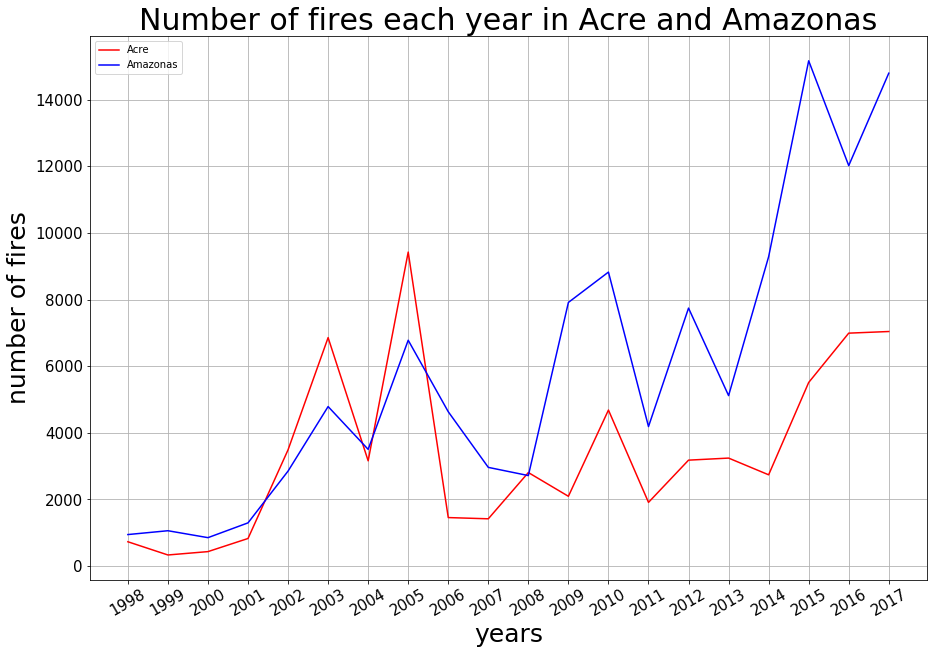

In [12]:
plt.figure(figsize=(15,10))
plt.plot(data3["year"], data3["number"], color="red", label="Acre")
plt.plot(data4["year"], data4["number"], color="blue", label="Amazonas")
plt.title("Number of fires each year in Acre and Amazonas", fontsize=30)
plt.xlabel("years", fontsize=25)
plt.ylabel("number of fires", fontsize=25)
plt.legend(loc=2)
plt.grid()
plt.xticks([i for i in range(1998,2018)],fontsize=15,rotation=30)
plt.yticks(fontsize=15)
plt.savefig("amaacre.png", dpi=80)